#1. 합성곱 신경망(convnet)이란?

In [6]:
# 간단한 컨브넷 만들기

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))

(height, width, channels)의 3d 텐서

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
938/938 [==============================] - 48s 50ms/step - loss: 0.4155 - accuracy: 0.8661
Epoch 2/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0489 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0325 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0357 - accuracy: 0.9899
0.9898999929428101


Flatten함수 : 3D텐서를 1D텐서로 펼쳐 준다.

#2. 합성곱 연산

완전 연결 층과 합성곱 층 간의 차이는?   

전체를 분석(전역 패턴 : 입력된 이미지의 모든 픽셀에 걸친 패턴) vs 부분을 분석(지역 패턴)   
이미지의 경우 작은 2D window로 입력에ㅓ 패턴을 찾는다.

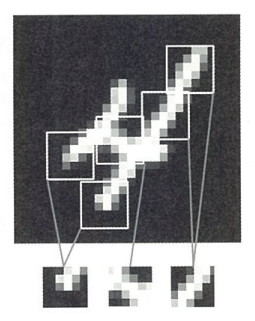

학습된 패턴은 평행 이동 불변성을 가진다.   
* 평행 이동 불변성 : 세상을 평행 이동에 구애받지 않는 시각으로 인식.   
완전 연결 네트워크의 경우 새로운 위치의 데이터는 새로운 패턴으로 학습하지만,   
ConvNet의 경우 어떤 부분에서 패턴을 학습했다면 다른 것에서도 이 패턴 인식 가능.

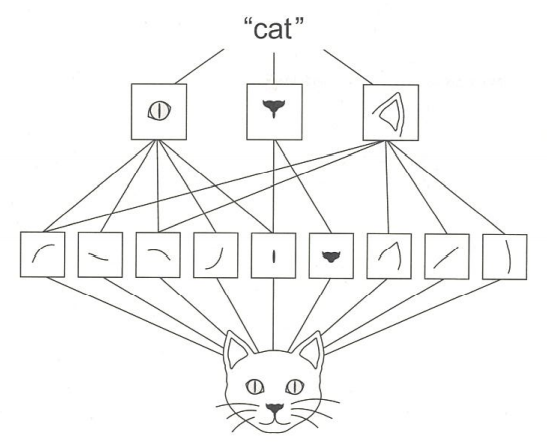

ConvNet은 첫 층에서 작은 지역 패턴 학습 → 다음 층에서 더 큰 지역 패턴을 학습하는 방식으로 학습한다   
→ 매우 복잡하고 추상적인 시각적 개념을 효과적으로 학습할 수 있음.

#3. 특성 맵(Feature map)

합성곱 연산은 feature map이라고 하는 3d 텐서에 적용된다.   
입력 특성 맵(input feature map)에서 작은 패치들을 추출하고, 이런 모든 패치에 같은 변환을 적용하여 출력 특성 맵(output feature map)을 만든다.

이 경우, 깊이 축의 채널은 필터를 의미   
필터 : 입력 데이터의 어떤 특성을 인코딩   


#4. 합성곱의 2가지 핵심 파라미터

1. 입력으로부터 뽑아낼 패치의 크기
2. 특성 맵의 출력 깊이

#5. 패딩(padding)과 스트라이드(stride)

패딩 : 주변을 채워주는 것.   
conv 연산 등으로 크기가 작아졌을 때, 그 작아진 크기만큼 주변에 둘러줘숴 크기를 맞추는 역할.   
대표적인 예로 zero padding이 있다.

스트라이드 : 이동시킨다는 개념.
연속적인 윈도우 사이의 거리.   

대부분 스트라이드보다는 맥스 풀링(max pooling)을 더 많이 사용한다.

#6. 최대 풀링(max pooling)

패치들을 추출하고, 그 패치들의 최댓값을 각각 출력한다.   
feature map을 다운샘플링한다는 점에서는 스트라이드 합성곱과 매우 유사.   
convolution과의 차이점 : convolution은 3x3, strie 1을 사용화는 반면, max pooling은 2x2, stride 2를 사용한다.

###왜 다운샘플링을 하는가?

1. 처리할 특성 맵의 가중치를 줄이기 위해서.   
2. 공간적 계층 구조를 구성하기 위해서

#7. 평균 풀링(average pooling)

최대가 아닌, 각 패치들의 평균값을 뽑아내는 방법.

#8. 정리

* 특성 맵(feature map) : 3d 텐서. 입력 feature maop, 출력 feature map 등이 있음!   
* 합성곱(convolution)
* 최대 풀링(max pooling) : 